Shape of dataset: (200, 4)

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Target (Sales) distribution:
count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64


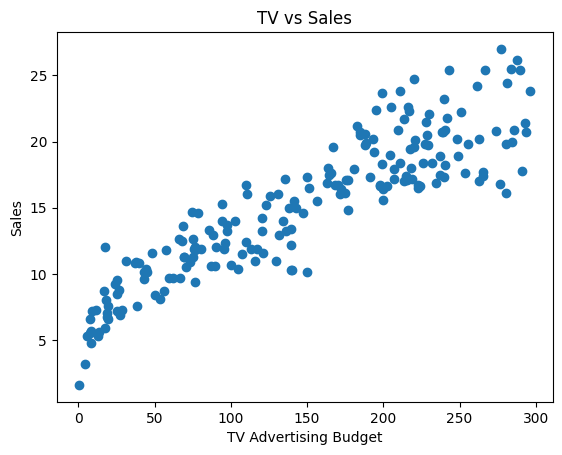

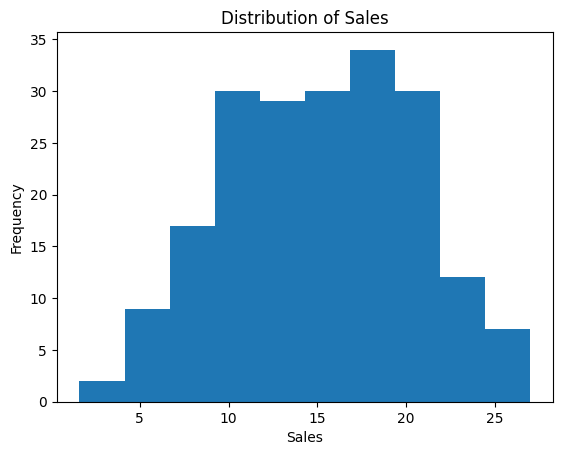

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("Advertising.csv")

# ---- EDA ----
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

print("\nTarget (Sales) distribution:")
print(df["Sales"].describe())

# Plot 1: TV vs Sales (relationship)
plt.figure()
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

# Plot 2: Sales distribution
plt.figure()
plt.hist(df["Sales"], bins=10)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()


In [5]:
# Feature and target
X = df[["TV"]]
y = df["Sales"]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Intercept:", model.intercept_)
print("TV Coefficient:", model.coef_[0])
print("MAE:", mae)
print("R² Score:", r2)


Intercept: 7.007108428241848
TV Coefficient: 0.0554829439314632
MAE: 1.9502948931650088
R² Score: 0.802561303423698
